In [58]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [59]:
"""Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python."""
"""2) Salary_hike -> Build a prediction model for Salary_hike"""

'2) Salary_hike -> Build a prediction model for Salary_hike'

In [60]:
# importing the data using pandas.
data=pd.read_csv('E:\SLR/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
...,...,...
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0


In [61]:
# creating a dataframe using pandas.
df=pd.DataFrame(data)
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
...,...,...
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0


In [62]:
# Now, After creating the dataframe the main step is to explore throughout the data.
# this exploration of data is considered as one of the main steps in the data analysis.
# in univaiate data we have done hypothesis testing types to get the desired output.
# now the data which we got is bivariate data with two varaibles , so we have to perform EDA on the data and check the relationship between them

In [63]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot: xlabel='YearsExperience', ylabel='Density'>

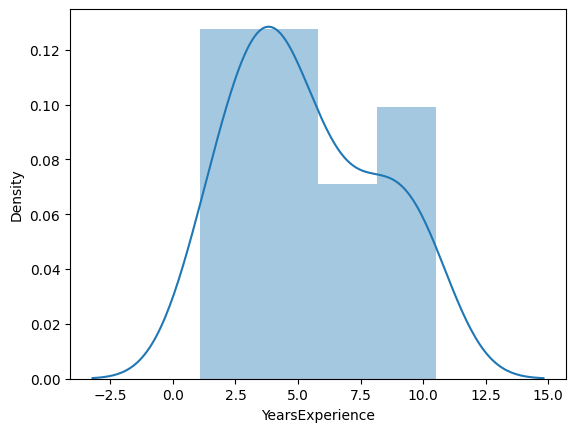

In [64]:
# we have previously used distplot to see that our data is folowing normal distribution or not
sns.distplot(df['YearsExperience'])

<AxesSubplot: xlabel='Salary', ylabel='Density'>

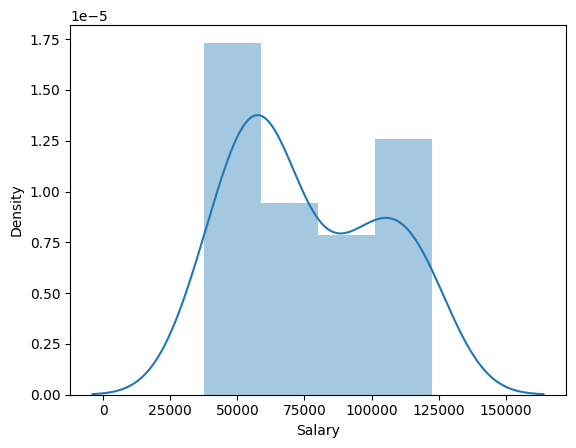

In [65]:
sns.distplot(df['Salary'])

array([[<AxesSubplot: title={'center': 'YearsExperience'}>,
        <AxesSubplot: title={'center': 'Salary'}>]], dtype=object)

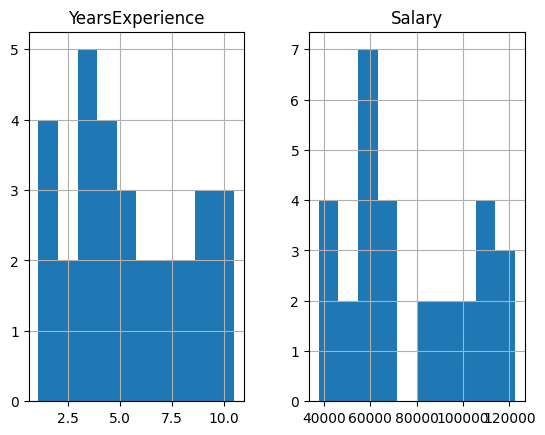

In [66]:
# histogram to check the distribution of data
df.hist()

<AxesSubplot: >

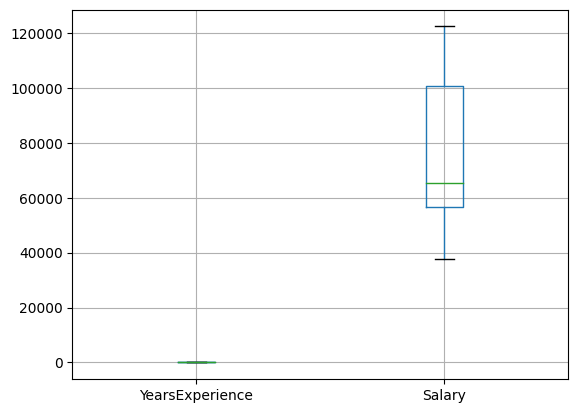

In [67]:
# boxplot will find out the outliers present in the data

df.boxplot()

# we can see  that there are no outliers in the data so we can continue the next eda process

In [68]:
# now we have to check the relation between the two variables

df.corr()

# we can see that there is a strong positive realtionship between Delivery Time and Sorting Time


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

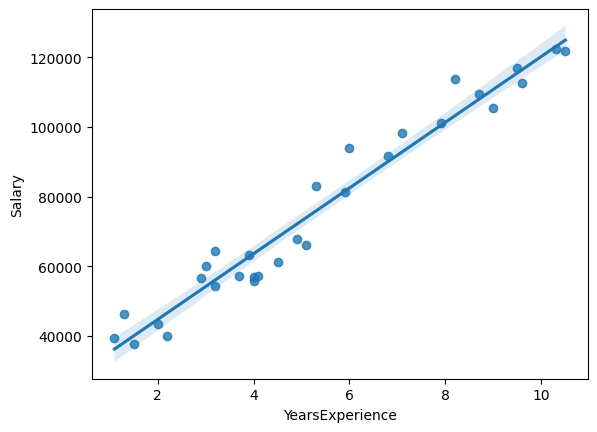

In [69]:
# plotting a regression plot to see where the actual data points lie on the plot
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

In [70]:
""" this time iam directly using ORDINARY LEAST SQUARE METHOD beacause its easy to get all the parameters with it"""

' this time iam directly using ORDINARY LEAST SQUARE METHOD beacause its easy to get all the parameters with it'

In [71]:
# fitting the regression model using ordinary least square method
model=smf.ols("Salary~YearsExperience",data=df).fit()

In [72]:
# Coefficient parameters i.e intercept and slope
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [73]:
# Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [74]:

# Rsquared and Rsquared adjusted values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [75]:
# giving data for Prediction let it be 3 and 5 years in experience
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [76]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [77]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [78]:
# Manual prediction for say 5 Years Experience
Salary3yr = (25792.200199) + (9449.962321)*(3)
print(Salary3yr)
Salary5yr = (25792.200199) + (9449.962321)*(5)
print(Salary5yr)
# checking the values to see if our prediction is right or Wrong


54142.087162
73042.01180400001
